# 图像增广

* 大型数据集是成功应用深度神经网络的先决条件
* 图像增广在对训练图像进行一系列的随机变化之后，生成相似但不同的训练样本，从而扩大了训练集的规模


# 图像增广

* 随机改变训练样本可以减少模型对某些属性的依赖，从而提高模型的泛化能力
    * 可以以不同的方式裁剪图像，使感兴趣的对象出现在不同的位置，减少模型对于对象出现位置的依赖
    * 可以调整亮度、颜色等因素来降低模型对颜色的敏感度
    
* 视频学习：[CES上的真实故事](https://www.bilibili.com/video/BV17y4y1g76q?p=1)

## 常用的图像增广方法

大多数图像增广方法都具有一定的随机性


In [5]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

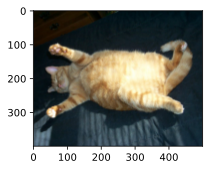

In [6]:
d2l.set_figsize()
img = d2l.Image.open('../img/cat1.jpg')
d2l.plt.imshow(img);

## 常用的图像增广方法

在输入图像`img`上多次运行图像增广方法`aug`并显示所有结果

In [7]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

### 翻转和裁剪

* 左右翻转图像通常不会改变对象的类别
* `RandomFlipLeftRight`实例
    * 50%的几率使图像向左或向右翻转


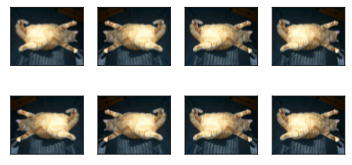

In [8]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

### 翻转和裁剪

* 上下翻转图像不如左右图像翻转那样常用
* 但是，至少对于这个示例图像，上下翻转不会妨碍识别
* `RandomFlipTopBottom`实例
    * 使图像各有50%的几率向上或向下翻转。

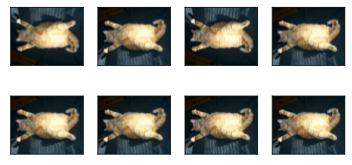

In [9]:
apply(img, torchvision.transforms.RandomVerticalFlip())

### 翻转和裁剪

* 池化层可以降低卷积层对目标位置的敏感性
* 也可以通过对图像进行随机裁剪，使物体以不同的比例出现在图像的不同位置
    * 降低模型对目标位置的敏感性

### 翻转和裁剪

* 随机裁剪一个面积为原始面积10%到100%的区域
* 该区域的宽高比从0.5到2之间随机取值
* 区域的宽度和高度都被缩放到200像素

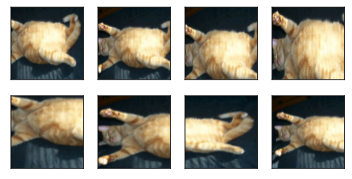

In [10]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

### 改变颜色

* 图像颜色的四个方面：亮度、对比度、饱和度和色调
* 随机更改图像的亮度（`brightness`）、对比度（`contrast`）、饱和度（`saturation`）和色调（`hue`）
    * 随机更改图像的亮度，随机值为原始图像的50%（$1-0.5$）到150%（$1+0.5$）之间

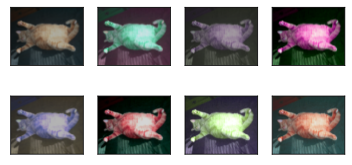

In [11]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

### 结合多种图像增广方法

* 使用一个`Compose`实例来综合上面定义的不同的图像增广方法，并将它们应用到每个图像

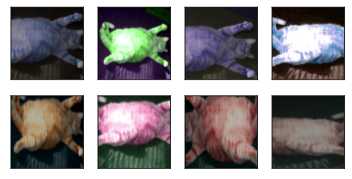

In [12]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

## 总结

* 为了在预测过程中得到确切的结果，通常对训练样本只进行图像增广，而在预测过程中不使用带随机操作的图像增广
* 阅读：图像增广.pdf